## Imaad Ullah
## Email: imaad3358@gmail.com
## GitHub link: https://github.com/ImaadUllah

## Decision Tree Full Tutorial on "Adults" dataset

 <a id="top"></a> <br>
**Notebook Content**
1. [Importing important libraries](#1)
1. [Reading the data](#2)
1. [Cleaning the data](#3)
1. [Data Preprocessing](#4)

    1. [Dropping categorical columns from the data](#41)
    1. [Concatinating both](#42)
1. [Building Model](#5)
    1. [Tuning with max_depth and  GridsearchCV](#51)
    1. [Tuning with min_samples_leaf](#52)
    1. [Tuning with min_samples_split](#53)
    1. [Tuning with all the parameters at once](#54)
    1. [Checking for the best accuracy from best estimator given by all the prarameters](#55)
    

<a id="1"></a> <br>
### Importing important libraries

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [12]:
import warnings
warnings.filterwarnings('ignore')

<a id="2"></a> <br>
### Reading the data

In [13]:
data = pd.read_csv(r'adult.csv')
data.sample(10)

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
20452,50,Local-gov,169182,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,0,49,Dominican-Republic,<=50K
14381,39,Private,101192,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
26364,29,Self-emp-not-inc,144063,7th-8th,4,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,72,United-States,<=50K
5222,57,Private,201159,HS-grad,9,Widowed,Sales,Not-in-family,White,Female,0,0,30,United-States,<=50K
11003,19,?,80978,HS-grad,9,Never-married,?,Own-child,White,Female,0,0,25,United-States,<=50K
39051,41,Private,170230,Bachelors,13,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,<=50K
48365,48,Private,105808,9th,5,Widowed,Transport-moving,Unmarried,White,Male,0,0,40,United-States,>50K
39576,39,Self-emp-not-inc,154641,HS-grad,9,Divorced,Farming-fishing,Not-in-family,White,Male,8614,0,50,United-States,>50K
26781,39,Federal-gov,129573,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,0,1741,40,United-States,<=50K
38838,55,Self-emp-not-inc,95149,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,99,United-States,<=50K


<a id="3"></a> <br>
### Cleaning the data

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational_num    48842 non-null int64
marital_status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital_gain       48842 non-null int64
capital_loss       48842 non-null int64
hours_per_week     48842 non-null int64
native_country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [15]:
df_wk = data[data['workclass'] == '?']
df_wk

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
13,58,?,299831,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,35,United-States,<=50K
22,72,?,132015,7th-8th,4,Divorced,?,Not-in-family,White,Female,0,0,6,United-States,<=50K
35,65,?,191846,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,<=50K
75,17,?,165361,10th,6,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
89,41,?,38434,Masters,14,Married-civ-spouse,?,Wife,White,Female,7688,0,10,United-States,>50K
100,51,?,189762,Some-college,10,Married-civ-spouse,?,Wife,White,Female,0,0,18,United-States,<=50K
113,20,?,30796,HS-grad,9,Never-married,?,Own-child,White,Female,0,0,20,United-States,<=50K
132,20,?,334105,HS-grad,9,Never-married,?,Not-in-family,White,Female,0,0,40,United-States,<=50K


In [16]:
df_wk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2799 entries, 4 to 48823
Data columns (total 15 columns):
age                2799 non-null int64
workclass          2799 non-null object
fnlwgt             2799 non-null int64
education          2799 non-null object
educational_num    2799 non-null int64
marital_status     2799 non-null object
occupation         2799 non-null object
relationship       2799 non-null object
race               2799 non-null object
gender             2799 non-null object
capital_gain       2799 non-null int64
capital_loss       2799 non-null int64
hours_per_week     2799 non-null int64
native_country     2799 non-null object
income             2799 non-null object
dtypes: int64(6), object(9)
memory usage: 349.9+ KB


In [17]:
data = data[data['workclass'] != '?']
data.sample(8)

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
34028,38,Private,219546,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K
35689,46,Private,251786,1st-4th,2,Separated,Other-service,Not-in-family,White,Female,0,0,40,Mexico,<=50K
1056,21,Private,220857,Some-college,10,Never-married,Sales,Own-child,White,Male,0,0,20,United-States,<=50K
12433,48,Private,101016,Masters,14,Divorced,Prof-specialty,Unmarried,White,Female,0,0,40,United-States,<=50K
45153,30,Private,212064,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Female,0,0,40,United-States,<=50K
26125,40,Private,168071,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,28,United-States,<=50K
40557,21,Private,161415,Some-college,10,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
44642,19,Self-emp-not-inc,45546,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,16,United-States,<=50K


In [18]:
data.shape

(46043, 15)

In [19]:
df_categorical = data.select_dtypes(include=['object'])
df_categorical.apply(lambda x: x== '?').sum()

workclass           0
education           0
marital_status      0
occupation         10
relationship        0
race                0
gender              0
native_country    811
income              0
dtype: int64

In [20]:
data = data[data['native_country'] != '?']
data = data[data['occupation'] != '?']
data.sample(8)

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
47633,32,State-gov,159247,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
8945,39,Self-emp-inc,88973,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,84,United-States,>50K
36437,18,Private,271935,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Female,0,0,40,United-States,<=50K
38711,41,Local-gov,32185,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32752,59,Private,205759,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,50,United-States,<=50K
16084,56,Private,235136,7th-8th,4,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,Dominican-Republic,<=50K
40492,75,Private,316119,Some-college,10,Widowed,Prof-specialty,Not-in-family,White,Female,0,0,8,United-States,<=50K
13943,48,Private,35406,Assoc-voc,11,Separated,Other-service,Not-in-family,White,Female,0,0,30,United-States,<=50K


In [21]:
data[data.occupation == '?']

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income


In [22]:
data[data['native_country'] == '?']

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income


In [23]:
df_categorical = data.select_dtypes(include=['object'])
df_categorical.apply(lambda x: x== '?').sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
gender            0
native_country    0
income            0
dtype: int64

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
age                45222 non-null int64
workclass          45222 non-null object
fnlwgt             45222 non-null int64
education          45222 non-null object
educational_num    45222 non-null int64
marital_status     45222 non-null object
occupation         45222 non-null object
relationship       45222 non-null object
race               45222 non-null object
gender             45222 non-null object
capital_gain       45222 non-null int64
capital_loss       45222 non-null int64
hours_per_week     45222 non-null int64
native_country     45222 non-null object
income             45222 non-null object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


<a id="4"></a> <br>
### Data Preprocessing

In [25]:
categorical_data = data.select_dtypes(include=['object'])
categorical_data.head(10)

,workclass,education,marital_status,occupation,relationship,race,gender,native_country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
5,Private,10th,Never-married,Other-service,Not-in-family,White,Male,United-States,<=50K
7,Self-emp-not-inc,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,>50K
8,Private,Some-college,Never-married,Other-service,Unmarried,White,Female,United-States,<=50K
9,Private,7th-8th,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
10,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
11,Federal-gov,Bachelors,Married-civ-spouse,Adm-clerical,Husband,White,Male,United-States,<=50K


In [26]:
lab_enc = preprocessing.LabelEncoder()
categorical_data = categorical_data.apply(lab_enc.fit_transform)

categorical_data.head(10)

,workclass,education,marital_status,occupation,relationship,race,gender,native_country,income
0,2,1,4,6,3,2,1,38,0
1,2,11,2,4,0,4,1,38,0
2,1,7,2,10,0,4,1,38,1
3,2,15,2,6,0,2,1,38,1
5,2,0,4,7,1,4,1,38,0
7,4,14,2,9,0,4,1,38,1
8,2,15,4,7,4,4,0,38,0
9,2,5,2,2,0,4,1,38,0
10,2,11,2,6,0,4,1,38,1
11,0,9,2,0,0,4,1,38,0


<a id="41"></a> <br>
### Dropping categorical columns from the data

In [27]:
data = data.drop(categorical_data.columns, axis=1)
data.head()

,age,fnlwgt,educational_num,capital_gain,capital_loss,hours_per_week
0,25,226802,7,0,0,40
1,38,89814,9,0,0,50
2,28,336951,12,0,0,40
3,44,160323,10,7688,0,40
5,34,198693,6,0,0,30


<a id="42"></a> <br>
### Concatinating both

In [28]:
data = pd.concat([data, categorical_data], axis=1)
data.head(10)

,age,fnlwgt,educational_num,capital_gain,capital_loss,hours_per_week,workclass,education,marital_status,occupation,relationship,race,gender,native_country,income
0,25,226802,7,0,0,40,2,1,4,6,3,2,1,38,0
1,38,89814,9,0,0,50,2,11,2,4,0,4,1,38,0
2,28,336951,12,0,0,40,1,7,2,10,0,4,1,38,1
3,44,160323,10,7688,0,40,2,15,2,6,0,2,1,38,1
5,34,198693,6,0,0,30,2,0,4,7,1,4,1,38,0
7,63,104626,15,3103,0,32,4,14,2,9,0,4,1,38,1
8,24,369667,10,0,0,40,2,15,4,7,4,4,0,38,0
9,55,104996,4,0,0,10,2,5,2,2,0,4,1,38,0
10,65,184454,9,6418,0,40,2,11,2,6,0,4,1,38,1
11,36,212465,13,0,0,40,0,9,2,0,0,4,1,38,0


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
age                45222 non-null int64
fnlwgt             45222 non-null int64
educational_num    45222 non-null int64
capital_gain       45222 non-null int64
capital_loss       45222 non-null int64
hours_per_week     45222 non-null int64
workclass          45222 non-null int32
education          45222 non-null int32
marital_status     45222 non-null int32
occupation         45222 non-null int32
relationship       45222 non-null int32
race               45222 non-null int32
gender             45222 non-null int32
native_country     45222 non-null int32
income             45222 non-null int32
dtypes: int32(9), int64(6)
memory usage: 4.0 MB


In [30]:
# why you have change type to category???
# Because I thought that this is what I am trying to predict, so thats why I changed it to category>>
# but cat types are usally change to integers as we are building model, if yo revert type it will execute
# so if I do not change it to category type , then will it work? yes
# SO I have to change or delete these two lines of code below, Thanks> yes just do it i am watching
# First let me run all the cells once again and delete these two lines.ok

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
age                45222 non-null int64
fnlwgt             45222 non-null int64
educational_num    45222 non-null int64
capital_gain       45222 non-null int64
capital_loss       45222 non-null int64
hours_per_week     45222 non-null int64
workclass          45222 non-null int32
education          45222 non-null int32
marital_status     45222 non-null int32
occupation         45222 non-null int32
relationship       45222 non-null int32
race               45222 non-null int32
gender             45222 non-null int32
native_country     45222 non-null int32
income             45222 non-null int32
dtypes: int32(9), int64(6)
memory usage: 4.0 MB


In [32]:
# now the type of income feature is int32, so what it means that it is correct now? yes

In [33]:
data.dtypes

age                int64
fnlwgt             int64
educational_num    int64
capital_gain       int64
capital_loss       int64
hours_per_week     int64
workclass          int32
education          int32
marital_status     int32
occupation         int32
relationship       int32
race               int32
gender             int32
native_country     int32
income             int32
dtype: object

In [34]:
# let me tell you what actually the problem is
# you have one of the column which is of cateogory type
data["income"].head()

0    0
1    0
2    1
3    1
5    0
Name: income, dtype: int32

<a id="5"></a> <br>
### Building Model

In [35]:
X = data.drop('income', axis=1) 
Y = data['income']

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [37]:
X_train.shape

(31655, 14)

In [38]:
Y_train.shape

(31655,)

In [39]:
Y_test.shape

(13567,)

In [40]:
X_test.shape

(13567, 14)

In [47]:
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [42]:
Y_pred_default = dt_default.predict(X_test)

In [43]:
print(classification_report(Y_test, Y_pred_default))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91     10273
           1       0.79      0.52      0.63      3294

   micro avg       0.85      0.85      0.85     13567
   macro avg       0.82      0.74      0.77     13567
weighted avg       0.84      0.85      0.84     13567



In [44]:
print(confusion_matrix(Y_test, Y_pred_default))

[[9812  461]
 [1578 1716]]


In [45]:
print(accuracy_score(Y_test, Y_pred_default))

0.8497088523623498


<a id="51"></a> <br>
### Tuning with max_depth and  GridsearchCV

In [49]:
n_folds = 5
parameters = {'max_depth': range(1, 40)}

In [50]:
dtree = DecisionTreeClassifier(criterion='gini')
tree = GridSearchCV(dtree, parameters, cv=n_folds, scoring='accuracy')
tree.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(1, 40)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [51]:
Y_pred_dtree = tree.predict(X_test)

In [52]:
print(accuracy_score(Y_test, Y_pred_dtree))

0.8508144763027935


In [57]:
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.025789,0.002483,0.003194,0.001932,1,{'max_depth': 1},0.750000,0.749961,0.749961,0.749961,...,0.749992,0.000046,39,0.749990,0.750000,0.750000,0.750000,0.749970,0.749992,0.000012
1,0.059962,0.015635,0.004407,0.001196,2,{'max_depth': 2},0.827701,0.820092,0.822619,0.821197,...,0.821482,0.003855,18,0.820242,0.822737,0.822106,0.821869,0.823218,0.822034,0.001014
2,0.089143,0.005496,0.004605,0.000489,3,{'max_depth': 3},0.841598,0.832412,0.835571,0.835413,...,0.834750,0.004230,13,0.833827,0.835532,0.834742,0.835374,0.837038,0.835302,0.001055
3,0.094542,0.024429,0.003993,0.001888,4,{'max_depth': 4},0.850442,0.838256,0.845048,0.840310,...,0.842363,0.004791,10,0.844450,0.840310,0.844653,0.840389,0.847621,0.843484,0.002795
4,0.089346,0.031164,0.004197,0.001479,5,{'max_depth': 5},0.855970,0.847575,0.850577,0.850734,...,0.849408,0.004512,5,0.850492,0.850063,0.850221,0.849194,0.853702,0.850734,0.001546


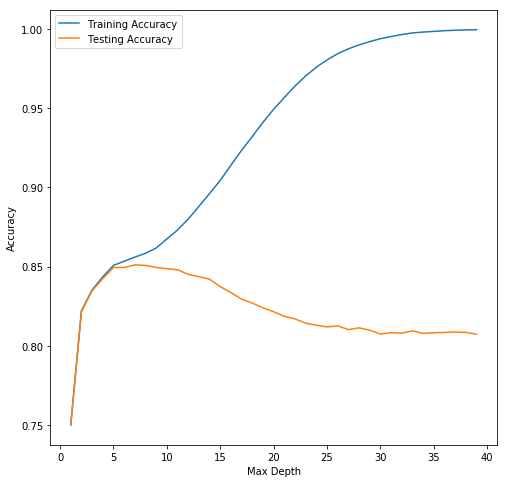

In [56]:
plt.figure(figsize=(8, 8))
plt.plot(scores['param_max_depth'],
        scores['mean_train_score'], 
        label='Training Accuracy')
plt.plot(scores['param_max_depth'],
        scores['mean_test_score'],
        label='Testing Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<a id="52"></a> <br>
### Tuning with min_samples_leaf

In [58]:
from sklearn.model_selection import KFold, GridSearchCV

In [59]:
n_folds = 5
parameters = {'min_samples_leaf': range(5, 200, 20)}

In [63]:
dtree_msl = DecisionTreeClassifier(criterion='gini')
tree_msl = GridSearchCV(dtree, parameters, cv=n_folds, scoring='accuracy')
tree_msl.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [64]:
Y_pred_dtree_msl = tree_msl.predict(X_test)

In [65]:
print(accuracy_score(Y_test, Y_pred_dtree_msl))

0.8508144763027935


In [81]:
scores_msl = tree_msl.cv_results_
s = pd.DataFrame(scores)
s.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.025789,0.002483,0.003194,0.001932,1,{'max_depth': 1},0.750000,0.749961,0.749961,0.749961,...,0.749992,0.000046,39,0.749990,0.750000,0.750000,0.750000,0.749970,0.749992,0.000012
1,0.059962,0.015635,0.004407,0.001196,2,{'max_depth': 2},0.827701,0.820092,0.822619,0.821197,...,0.821482,0.003855,18,0.820242,0.822737,0.822106,0.821869,0.823218,0.822034,0.001014
2,0.089143,0.005496,0.004605,0.000489,3,{'max_depth': 3},0.841598,0.832412,0.835571,0.835413,...,0.834750,0.004230,13,0.833827,0.835532,0.834742,0.835374,0.837038,0.835302,0.001055
3,0.094542,0.024429,0.003993,0.001888,4,{'max_depth': 4},0.850442,0.838256,0.845048,0.840310,...,0.842363,0.004791,10,0.844450,0.840310,0.844653,0.840389,0.847621,0.843484,0.002795
4,0.089346,0.031164,0.004197,0.001479,5,{'max_depth': 5},0.855970,0.847575,0.850577,0.850734,...,0.849408,0.004512,5,0.850492,0.850063,0.850221,0.849194,0.853702,0.850734,0.001546


In [77]:
list(s.columns)

['mean_fit_time',
 'std_fit_time',
 'mean_score_time',
 'std_score_time',
 'param_max_depth',
 'params',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'mean_test_score',
 'std_test_score',
 'rank_test_score',
 'split0_train_score',
 'split1_train_score',
 'split2_train_score',
 'split3_train_score',
 'split4_train_score',
 'mean_train_score',
 'std_train_score']

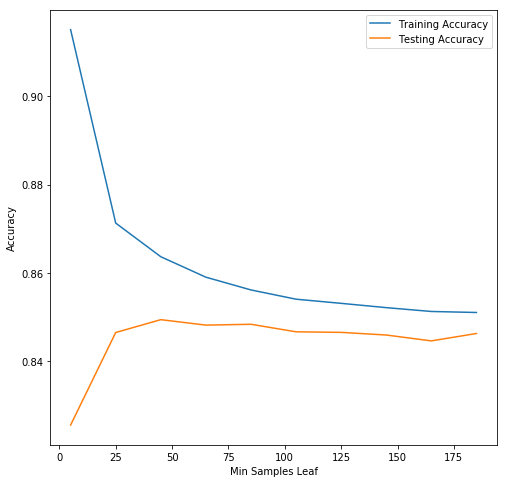

In [82]:
plt.figure(figsize=(8, 8))
plt.plot(scores_msl['param_min_samples_leaf'],
        scores_msl['mean_train_score'], 
        label='Training Accuracy')
plt.plot(scores_msl['param_min_samples_leaf'],
        scores_msl['mean_test_score'],
        label='Testing Accuracy')
plt.xlabel('Min Samples Leaf')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<a id="53"></a> <br>
### Tuning with min_samples_split

In [83]:
from sklearn.model_selection import KFold, GridSearchCV

In [84]:
n_folds = 5
parameters = {'min_samples_split': range(5, 200, 20)}

In [85]:
dtree_mss = DecisionTreeClassifier(criterion='gini')
tree_mss = GridSearchCV(dtree, parameters, cv=n_folds, scoring='accuracy')
tree_mss.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [86]:
Y_pred_dtree_mss = tree_mss.predict(X_test)

In [87]:
print(accuracy_score(Y_test, Y_pred_dtree_mss))

0.853320557234466


In [88]:
scores_mss = tree_mss.cv_results_
mss = pd.DataFrame(scores)
mss.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.025789,0.002483,0.003194,0.001932,1,{'max_depth': 1},0.750000,0.749961,0.749961,0.749961,...,0.749992,0.000046,39,0.749990,0.750000,0.750000,0.750000,0.749970,0.749992,0.000012
1,0.059962,0.015635,0.004407,0.001196,2,{'max_depth': 2},0.827701,0.820092,0.822619,0.821197,...,0.821482,0.003855,18,0.820242,0.822737,0.822106,0.821869,0.823218,0.822034,0.001014
2,0.089143,0.005496,0.004605,0.000489,3,{'max_depth': 3},0.841598,0.832412,0.835571,0.835413,...,0.834750,0.004230,13,0.833827,0.835532,0.834742,0.835374,0.837038,0.835302,0.001055
3,0.094542,0.024429,0.003993,0.001888,4,{'max_depth': 4},0.850442,0.838256,0.845048,0.840310,...,0.842363,0.004791,10,0.844450,0.840310,0.844653,0.840389,0.847621,0.843484,0.002795
4,0.089346,0.031164,0.004197,0.001479,5,{'max_depth': 5},0.855970,0.847575,0.850577,0.850734,...,0.849408,0.004512,5,0.850492,0.850063,0.850221,0.849194,0.853702,0.850734,0.001546


In [89]:
list(mss.columns)

['mean_fit_time',
 'std_fit_time',
 'mean_score_time',
 'std_score_time',
 'param_max_depth',
 'params',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'mean_test_score',
 'std_test_score',
 'rank_test_score',
 'split0_train_score',
 'split1_train_score',
 'split2_train_score',
 'split3_train_score',
 'split4_train_score',
 'mean_train_score',
 'std_train_score']

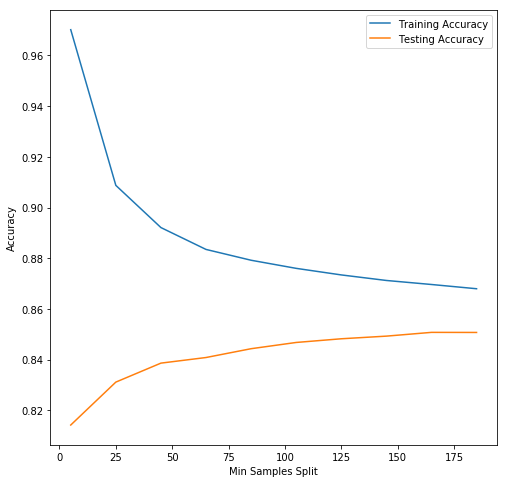

In [91]:
plt.figure(figsize=(8, 8))
plt.plot(scores_mss['param_min_samples_split'],
        scores_mss['mean_train_score'], 
        label='Training Accuracy')
plt.plot(scores_mss['param_min_samples_split'],
        scores_mss['mean_test_score'],
        label='Testing Accuracy')
plt.xlabel('Min Samples Split')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<a id="54"></a> <br>
### Tuning with all the parameters at once

In [92]:
param_grid = {
    'max_depth': range(5, 150, 50),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ['entropy', 'gini']
}

In [93]:
n_folds = 5

In [94]:
dtree_param_grid = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=dtree_param_grid, 
                           param_grid=param_grid,
                          cv=n_folds, verbose=1)

In [95]:
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   13.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(5, 150, 50), 'min_samples_leaf': range(50, 150, 50), 'min_samples_split': range(50, 150, 50), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [96]:
cv_results = pd.DataFrame(grid_search.cv_results_)

In [98]:
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.077957,0.007914,0.002805,0.000977,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.853759,...,0.848270,0.004475,11,0.846701,0.848523,0.848247,0.848168,0.850622,0.848452,0.001257
1,0.066161,0.002636,0.002811,0.000396,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.853759,...,0.848270,0.004475,11,0.846701,0.848523,0.848247,0.848168,0.850622,0.848452,0.001257
2,0.067558,0.002063,0.002802,0.000403,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.853759,...,0.848081,0.004385,13,0.846701,0.848128,0.848010,0.847733,0.850069,0.848128,0.001093
3,0.064970,0.001670,0.002392,0.000488,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.853759,...,0.848081,0.004385,13,0.846701,0.848128,0.848010,0.847733,0.850069,0.848128,0.001093
4,0.121529,0.003927,0.002999,0.000002,entropy,55,50,50,"{'criterion': 'entropy', 'max_depth': 55, 'min...",0.846810,...,0.849029,0.003423,5,0.862181,0.861831,0.861159,0.861910,0.864482,0.862312,0.001136
5,0.120530,0.002867,0.002807,0.000394,entropy,55,50,100,"{'criterion': 'entropy', 'max_depth': 55, 'min...",0.846810,...,0.848934,0.003512,7,0.862181,0.861831,0.861159,0.861910,0.864482,0.862312,0.001136
6,0.106746,0.002472,0.002998,0.000012,entropy,55,100,50,"{'criterion': 'entropy', 'max_depth': 55, 'min...",0.848389,...,0.847291,0.001359,21,0.853888,0.853854,0.855118,0.854960,0.856032,0.854770,0.000820
7,0.107542,0.001619,0.002402,0.000478,entropy,55,100,100,"{'criterion': 'entropy', 'max_depth': 55, 'min...",0.848389,...,0.847291,0.001359,21,0.853888,0.853854,0.855118,0.854960,0.856032,0.854770,0.000820
8,0.118134,0.003424,0.002603,0.000484,entropy,105,50,50,"{'criterion': 'entropy', 'max_depth': 105, 'mi...",0.846810,...,0.848934,0.003512,7,0.862181,0.861831,0.861159,0.861910,0.864482,0.862312,0.001136
9,0.119532,0.001742,0.002402,0.000494,entropy,105,50,100,"{'criterion': 'entropy', 'max_depth': 105, 'mi...",0.846810,...,0.849029,0.003423,5,0.862181,0.861831,0.861159,0.861910,0.864482,0.862312,0.001136


In [99]:
print('Best Accuracy is: ', grid_search.best_score_)
print('\n\n')
print(grid_search.best_estimator_)

Best Accuracy is:  0.8504817564365819



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=55,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


<a id="55"></a> <br>
### Checking for the best accuracy from best estimator given by all the prarameters

In [100]:
clf_best = DecisionTreeClassifier(criterion='gini',
                                 max_depth=55,
                                 min_samples_leaf=50,
                                 min_samples_split=100)
clf_best.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=55,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [101]:
ypred_best = clf_best.predict(X_test)

In [104]:
print(accuracy_score(Y_test, ypred_best))

0.8529520159209848
